# GARCH Process and The Box-Jenkins Methodology

## Residuals

The difference between the observed $y$ values and the corresponding fitted $\hat{y}$ are the training set or residuals.

<p align="center"> $\epsilon_t = y_t - \hat{y_t} = y_t - \hat{\beta_0} - \hat{\beta_1}x_{2,t} - ... - \hat{\beta_k}x_{k,t}$ </p>

<p align="center"> $\Leftrightarrow y_t = \hat{\beta_0} - \hat{\beta_1}x_{2,t} - ... - \hat{\beta_k}x_{k,t} + \epsilon_t$ </p>


## Autocorrelation and Time-Series Models

**The Phenomenon of Autocorrelation:** 

This happens when the sample data have been collected over time and the regression model fails to effectively capture time trends. This means that **The Random Errors** in the model are often positively correlated over time. This gives us an ineffeficient forecast, i.e. there is some information left over which should be accounted for in the model in order to obtain better forecasts. This can be detected by plotting the model residuals over time using **ACFs and PACFs**.

**ACFs:** are a way to measure the linear relationship between an observation at time $t$ and the observations at previous times/

**PACFs:** measure the relationship between only $y_t$ and $y_{t-k}$, i.e. the marginal autocorrelation. This is useful to identify the order of an autogressive model.

## Ljung-Box Q Test

is used to test whether or not observations over time are random and independent.

<p align="center"> $H_0:$ The autocorrelations up to lag $k$ are all 0 </p>
   
<p align="center"> $H_1:$ The autocorrelations of one or more lags differ from 0 </p>
    
When autocorrelated error terms are found, then the first remedial measure is to investigate the omission of a key predictor variable.

**a. Autocorrelation of Residuals in Levels:** 

Increase the number of lags within the $ARMA(p,q)$ model.

**b. Autocorrelation of Residuals in their Squares:**

ARCH effects modelled may not be enough, incorporate GARCH effects as well.

## Box-Jenkins Methodology

**Main Objective:** If all is correct, the only difference between the model's output and the actual data should be random (white) noise. If this difference has a pattern, we have left something out of the model or otherwise mis-specified it. This comes up in the form of statistically significant autocorrelation in the residuals (patterns). This means that **The model output differs from reality in a systematic way**.

It is not often possible for GARCH proceeses to fit real world data in a perfect way. Therefore, it is important to test the estimation methods on simulated data (fictitious data constructed solely for the purpose of fitting our model of interest).

*Method used:* garchSim method from the fGarch package to create the data from our model.

**AR(3)-GARCH(2,2):**
<p align="center"> $\text{Conditional Mean:}$ $y_t = 0.5 y_{t-1} + 0.2y_{t-2} - 0.1y_{t-3} + u_t$ </p>

<p align="center">$u_t = \epsilon_t\sqrt{h_t}$ </p>

<p style="text-align: center;">$\epsilon_t \sim N(0,1)$ </p>

<p style="text-align: center;">$\text{Conditional Variance:}$ $h_t = 0.001 + 0.3u^2_{t-1} + 0.2u^2_{t-2} + 0.2h_{t-1} + 0.1h_{t-2}$ </p>

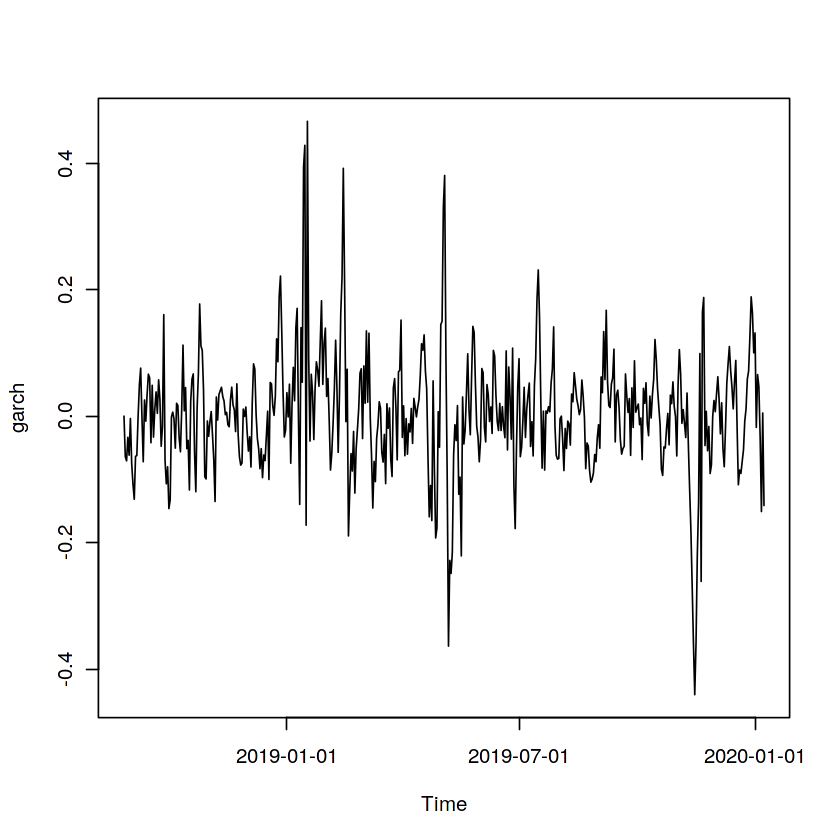

In [2]:
library(fGarch)
library(forecast)
# generate simulated process
spec = garchSpec(model = list(omega = 0.001, ar = c(0.5, 0.2, -0.1),
alpha = c(0.3, 0.2),
beta = c(0.2, 0.1)))
process = garchSim(spec , n = 500)
plot(process)

## Main Findings

**Persistence:**
The process is clearly mean reverting.

The process does not have the properties of a unit root process, with or without drift – it has no tendency to wander away from its mean or drift in an upward or downward trend, nor does it have a clear time trend. We therefore conclude it is not difference or trend stationary. There are periods of high volatilty followed by periods of tranquillity.

There is clearly some persistence in the series. When it deviates from its long run mean, it takes several periods for the process to return to the mean value.

**Volatility:**
The process clearly has a bounded variability.

There clear periods of excessive volatility, followed by periods of relative tranquility. These are characteristics of ARCH/GARCH processes.

If later tests confirm statistically significant ARCH/GARCH effects, any encompassing model must allow for these effects to capture all the time series properties of the process.


## Autocorrelation Functions

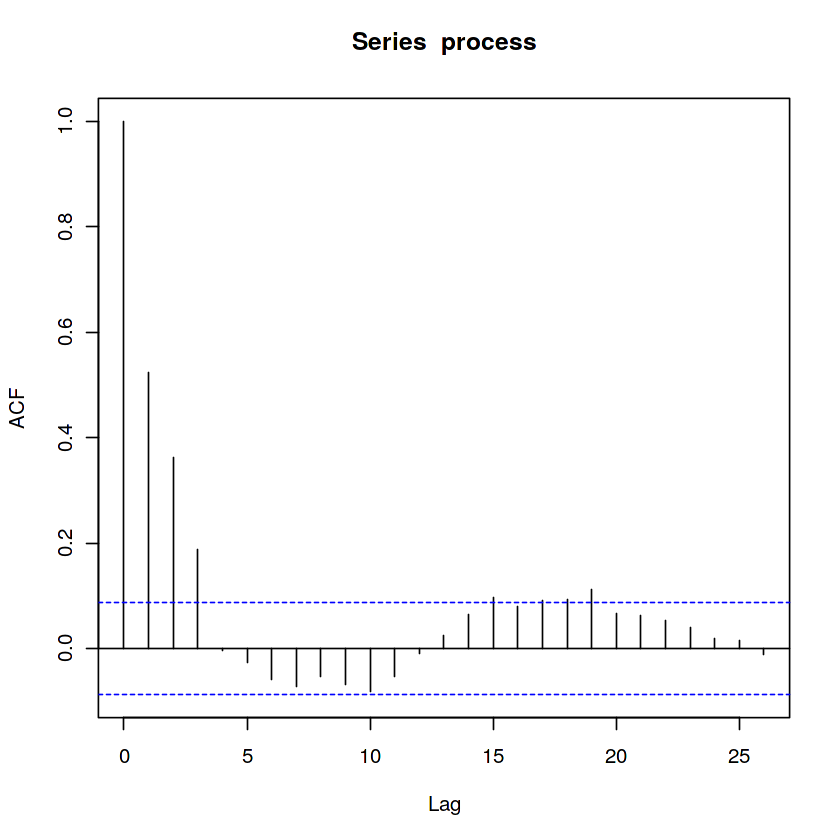

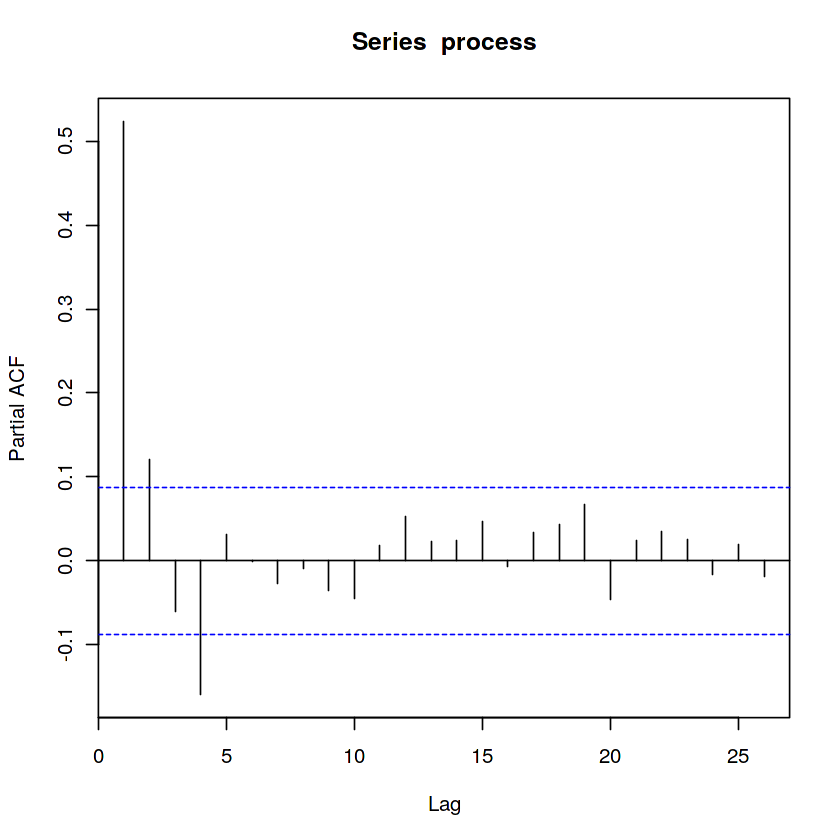

In [8]:
acf(process)
pacf(process)

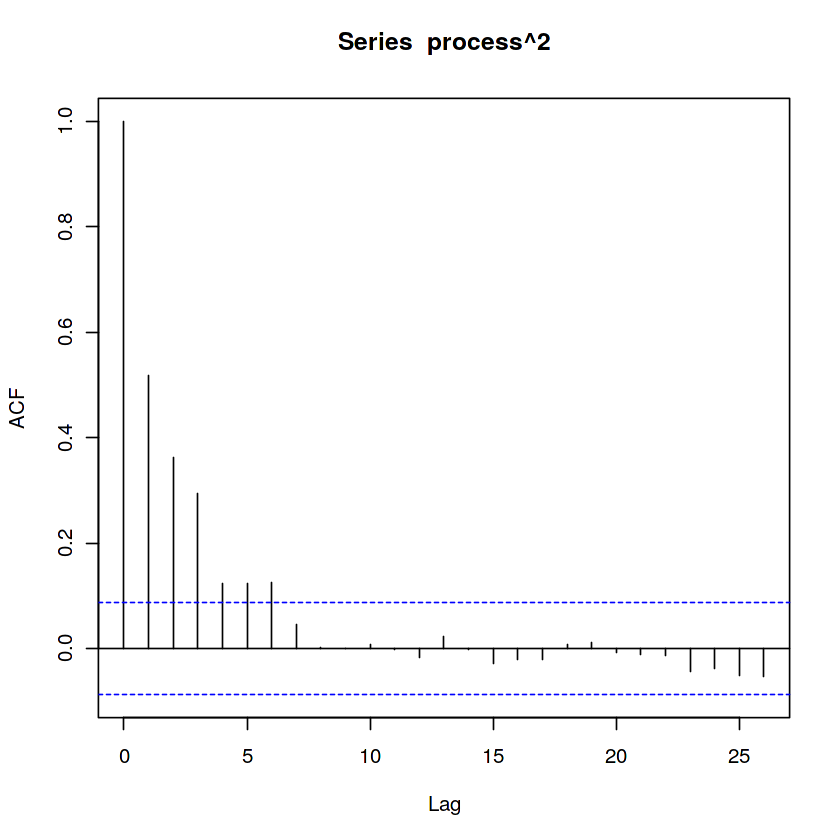

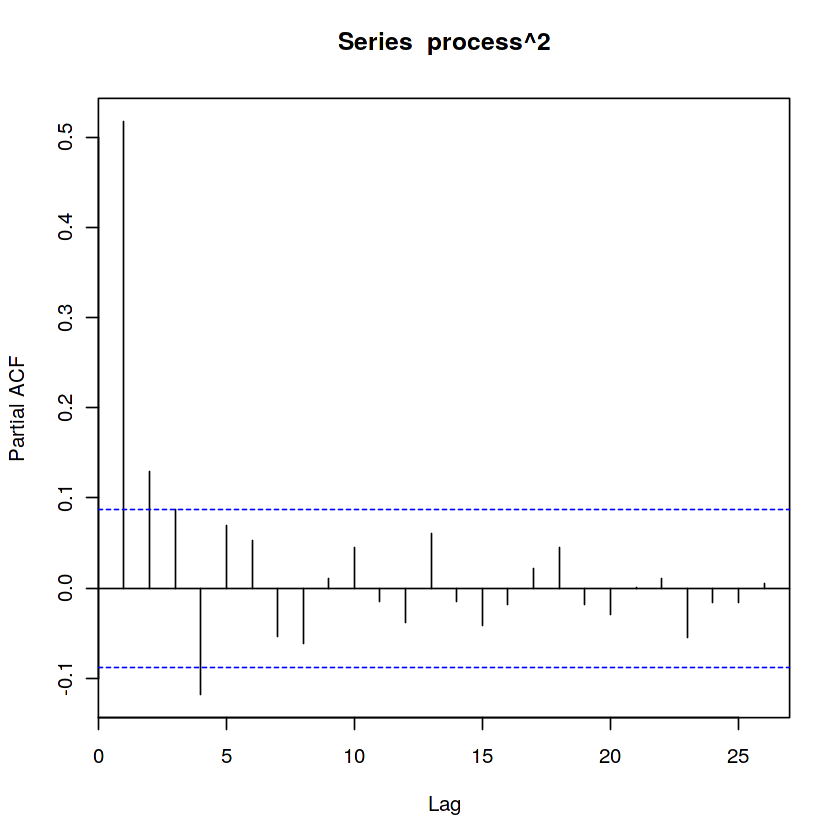

In [9]:
acf(process^2)
pacf(process^2)

### Level of the process:

The process shows typical characteristics of a somewhat persistent series; the ACF decays over time and PACF has only a few statistically significant values at low lags.

The ACF decays relatively rapidly, so the process will be far away from non-stationarity/ unit root like character. The PACF is only statistically significant up to the third lag, so an AR(3) process is a good initial guess for the conditional expectation process.   

There is clear evidence of oscillatory behavior in the ACF. This means that (a) a greater than first order AR process will be necessary to capture the time series properties of the process, and (b) the roots of the polynomial will likely be complex. Given the pattern in the PACF, we anticipate that if we estimate an AR(3) process, the first coefficient will be largest and positive, the second smaller and positive, and the third negative. 


### Square of the process:

There is statistically significant auto-correlation in the volatility of the process, confirming the initial suspicions of ARCH effects.

The ACF and PACF do not have significant elements at long lags, thus an ARCH/GARCH model will likely be good at capturing all the time series processes.

The PACF has the characteristics of a moving average process (alternating periods of positive followed by negative spikes) thus it is likely that a GARCH effect will be necessary over and above ARCH effects.


# Fitting Models

In [4]:
model1 <- garchFit(formula ~ garch(3,0), data = process, trace = FALSE)
summary(model1)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = formula ~ garch(3, 0), data = process, trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(3, 0)
<environment: 0x5595e34fc7a8>
 [data = process]

Conditional Distribution:
 norm 

Coefficient(s):
       mu      omega     alpha1     alpha2     alpha3  
0.0019573  0.0020702  0.5179560  0.2389565  0.0712207  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     0.0019573   0.0033936    0.577  0.56410    
omega  0.0020702   0.0003263    6.345 2.22e-10 ***
alpha1 0.5179560   0.1017042    5.093 3.53e-07 ***
alpha2 0.2389565   0.0795923    3.002  0.00268 ** 
alpha3 0.0712207   0.0411466    1.731  0.08347 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 575.1703    normalized:  1.150341 

Description:
 Thu Jan  9 15:08:28 2020 by user:  


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R

While this model is sufficient to capture the time series properties of the squared residuals (GARCH effects), the levels of the residuals are still auto-correlated. The residuals test as normal.

The tests for autocorrelation in the residuals all reject the hypothesis of no autocorrelation in the levels of the residuals at the 1% level, but the hypotheses of no autocorrelation in the squares of the residuals are not rejected. Thus we conclude that GARCH effects may be necessary to correctly model the conditional variance. The model is not adequate; however, the model is not-encompassing of the time series properties of conditional expectation of the process.

## Fitting the Correct Model (AR(3)-GARCH(2,2))

In [5]:
model2 <- garchFit(formula ~ arma(3,0) + garch(2,2), data = process, trace = F)
summary(model2)

Warning message in sqrt(diag(fit$cvar)):
“NaNs produced”


Title:
 GARCH Modelling 

Call:
 garchFit(formula = formula ~ arma(3, 0) + garch(2, 2), data = process, 
    trace = F) 

Mean and Variance Equation:
 data ~ arma(3, 0) + garch(2, 2)
<environment: 0x5595ddb28c00>
 [data = process]

Conditional Distribution:
 norm 

Coefficient(s):
         mu          ar1          ar2          ar3        omega       alpha1  
 0.00133855   0.50035570   0.16428238  -0.14935442   0.00150205   0.37690861  
     alpha2        beta1        beta2  
 0.30116272   0.00000001   0.07996685  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      1.339e-03   2.398e-03    0.558 0.576654    
ar1     5.004e-01   4.763e-02   10.504  < 2e-16 ***
ar2     1.643e-01   4.933e-02    3.330 0.000868 ***
ar3    -1.494e-01   3.786e-02   -3.945 7.98e-05 ***
omega   1.502e-03          NA       NA       NA    
alpha1  3.769e-01   8.045e-02    4.685 2.80e-06 ***
alpha2  3.012e-01          NA       NA       NA    
beta1   1.000

In this case all diagnostic tests look good, i.e. normal and without autocorrelation in either level or square.

The **AR** coefficients are significant and almost within two standard deviations of their true values.

**GARCH** coefficients **ALPHAS** are significant but statistically significantly different from their true values.

**GARCH** coefficients **BETAS** are nowhere near significant.

This often happens in situations where there are both AR and MA effects in either the conditional expectation or condition variance. Maybe a simpler model is able to capture the same time series properties more parsimoniously. There may exist many different but equivalent representations of the same process.

Fitting an **AR(3) - ARCH(2)** model yields the best results as can be seen below.

In [6]:
model3 <- garchFit(formula ~ arma(3,0) + garch(2,0), data = process, trace = F)
summary(model3)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = formula ~ arma(3, 0) + garch(2, 0), data = process, 
    trace = F) 

Mean and Variance Equation:
 data ~ arma(3, 0) + garch(2, 0)
<environment: 0x5595e17b3c38>
 [data = process]

Conditional Distribution:
 norm 

Coefficient(s):
        mu         ar1         ar2         ar3       omega      alpha1  
 0.0013034   0.4965658   0.1587960  -0.1608439   0.0017755   0.4210725  
    alpha2  
 0.2968279  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu      0.001303    0.002428    0.537 0.591352    
ar1     0.496566    0.048702   10.196  < 2e-16 ***
ar2     0.158796    0.047154    3.368 0.000758 ***
ar3    -0.160844    0.037869   -4.247 2.16e-05 ***
omega   0.001775    0.000241    7.368 1.73e-13 ***
alpha1  0.421073    0.080626    5.223 1.77e-07 ***
alpha2  0.296828    0.073851    4.019 5.84e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 65